### Time Series Analysis

In [284]:
from pandas import read_excel
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,6

import pmdarima as pm
from pmdarima import auto_arima
import warnings

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import math
from math import sqrt

In [364]:
#loading the data
newindex = pd.read_excel('Electric_Production.xlsx',sheet_name='Electric_Production',header=0, index_col=0,
                    parse_dates=True,squeeze=True)

<AxesSubplot: xlabel='DATE'>

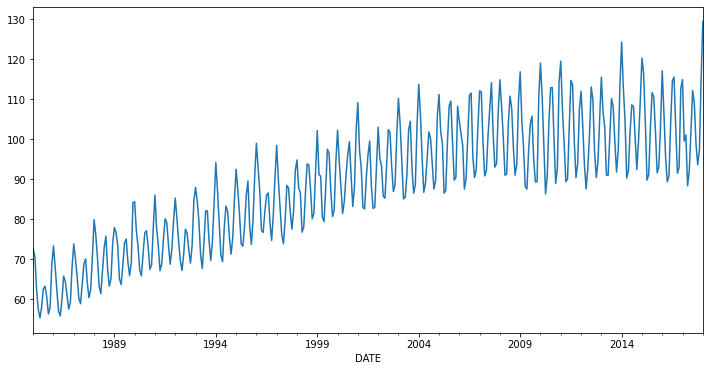

In [365]:
#plotting the data
newindex.plot()

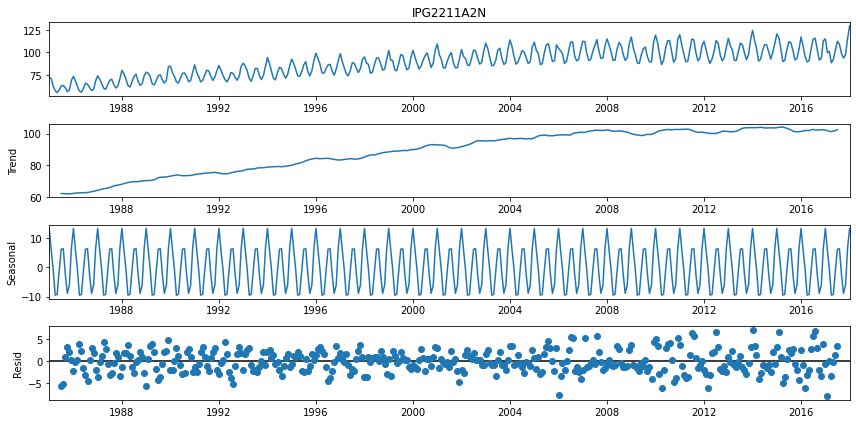

In [366]:
#splits the time series data into observed, trend, seasonal, and residuals for a better understanding of the time series data
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(newindex, model='Additive')
result.plot()
plt.show()

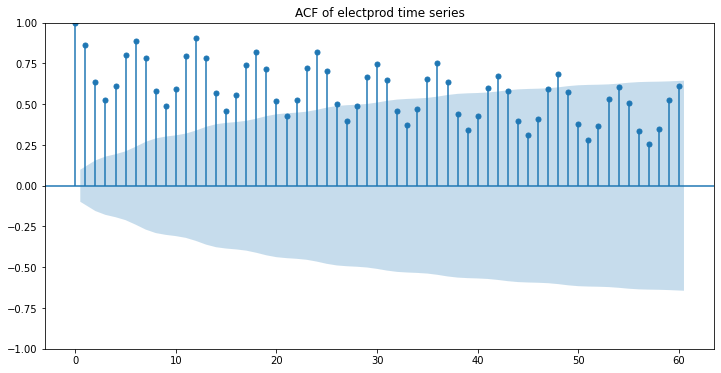

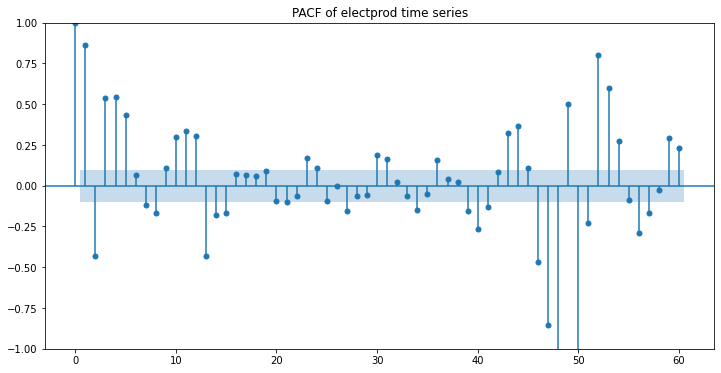

In [367]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF plot on 60 time lags
plot_acf(newindex, title='ACF of electprod time series', lags=60)

# PACF plot on 60 time lags
plot_pacf(newindex, title='PACF of electprod time series', lags=60)
plt.show()

In [368]:
#Generates the test results

from statsmodels.tsa.stattools import adfuller
X = newindex.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.256990
p-value: 0.186215
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571


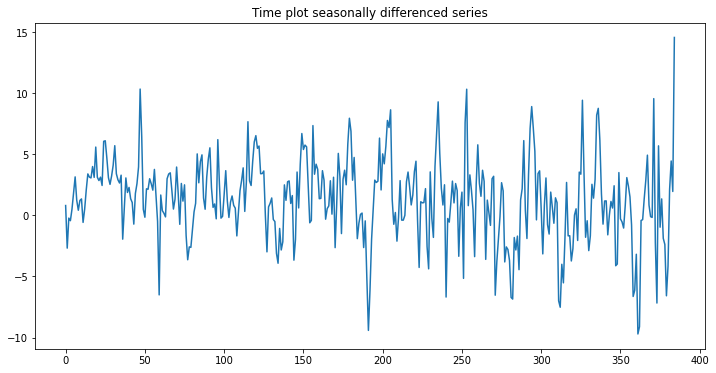

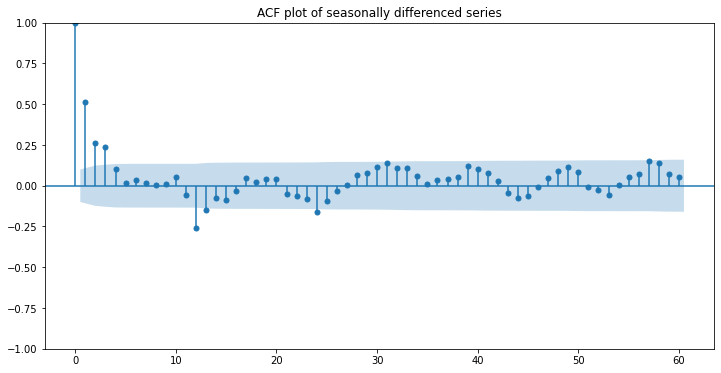

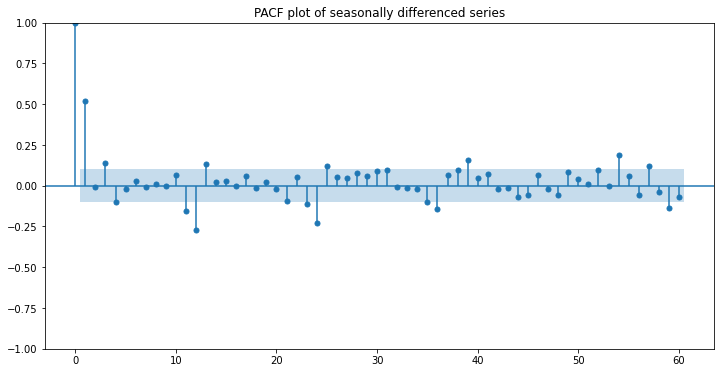

In [369]:
##removing seasonality and trend from time series using seasonal/non seasonal differencing

from pandas import read_excel
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot


#  Seaonal difference
K = newindex.values
SeasDiff = list()
for i in range(12, len(K)):
 value = K[i] - K[i - 12]
 SeasDiff.append(value)

# Time, ACF, and PACF plots for the seasonally differenced series
pyplot.plot(SeasDiff)
pyplot.title('Time plot seasonally differenced series')
plot_acf(SeasDiff, title='ACF plot of seasonally differenced series', lags=60)
plot_pacf(SeasDiff, title='PACF plot of seasonally differenced series', lags=60)
pyplot.show()


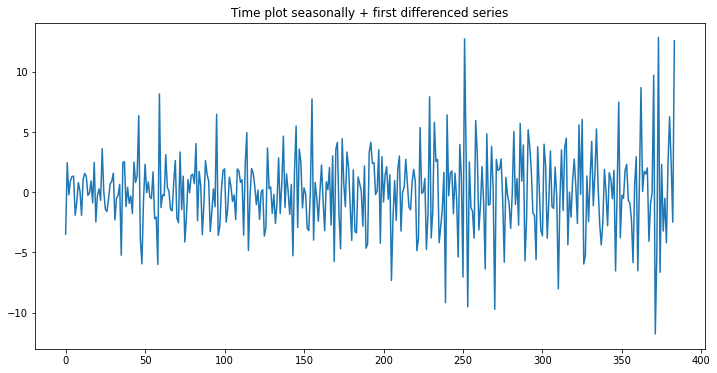

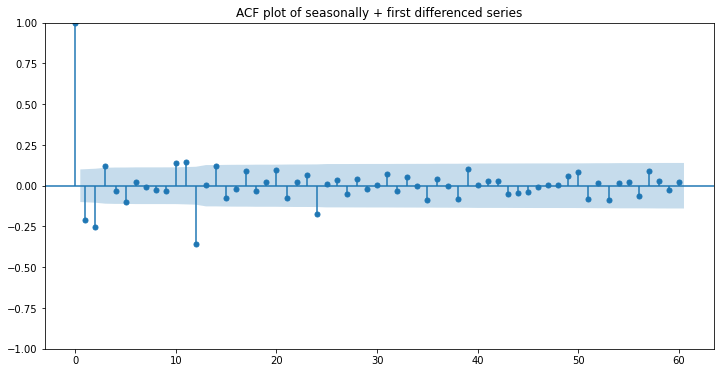

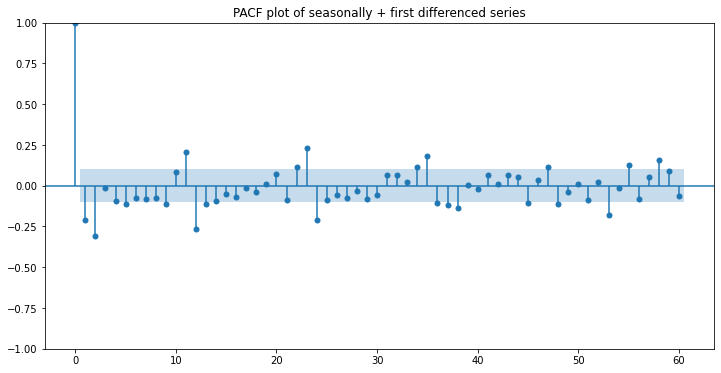

In [370]:
### Seasonal + First difference
Y = SeasDiff
SeasFirstDiff = list()
for i in range(1, len(Y)):
 value = Y[i] - Y[i - 1]
 SeasFirstDiff.append(value)

# Time, ACF, and PACF plots for the seasonally + first differenced series
pyplot.plot(SeasFirstDiff)
pyplot.title('Time plot seasonally + first differenced series')
plot_acf(SeasFirstDiff, title='ACF plot of seasonally + first differenced series', lags=60)
plot_pacf(SeasFirstDiff, title='PACF plot of seasonally + first differenced series', lags=60)
pyplot.show()


ADF Statistic: -8.022039
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571


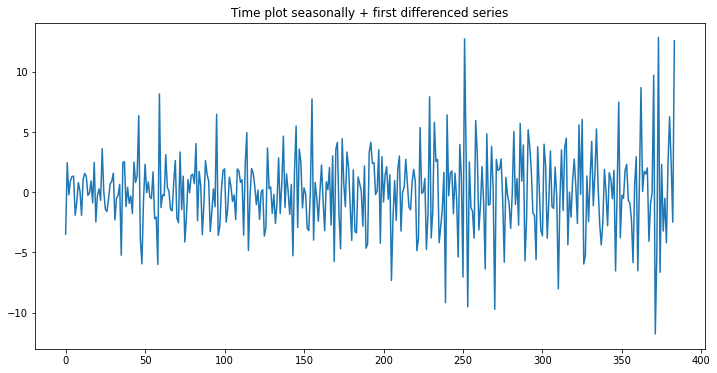

In [371]:
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot

#Differenced time series data
pyplot.plot(SeasFirstDiff)
pyplot.title('Time plot seasonally + first differenced series')

#Adf test statistics
result = adfuller(SeasFirstDiff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [372]:
#Deciding the best model
import pmdarima as pm
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [373]:
model1 = auto_arima(newindex, start_p=0, start_q=0,
                          max_p=2, max_q=2,m=12,start_P=0,start_Q=0, 
                          max_P = 2, max_Q = 2,
                          seasonal=True,
                          d=1,D=1,trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2010.162, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1940.101, Time=0.45 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1835.298, Time=0.50 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1972.417, Time=0.18 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1836.547, Time=0.76 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1835.973, Time=3.52 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1923.364, Time=0.25 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1835.172, Time=3.17 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=1814.635, Time=4.58 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=1823.212, Time=1.86 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=1852.611, Time=2.95 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=1770.670, Time=4.85 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=1785.329, Time=4.36 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=1773.643, Time=3.35 sec
 ARIMA(1,1,1)(1,1,1

In [374]:
#splitting dataset
train_data = newindex[:317]
test_data = newindex[317:]
#Fitting the ARIMA model and printing related statistics
# ARIMA(1, 1, 1)(2,1,2)12 in this case;
from statsmodels.tsa.statespace.sarimax import SARIMAX
final_model = SARIMAX(train_data,order=(1,1,1),seasonal_order=(2,1,2,12))
results = final_model.fit()
print(results.summary())

                                        SARIMAX Results                                        
Dep. Variable:                              IPG2211A2N   No. Observations:                  317
Model:             SARIMAX(1, 1, 1)x(2, 1, [1, 2], 12)   Log Likelihood                -669.584
Date:                                 Mon, 26 Jun 2023   AIC                           1353.168
Time:                                         15:44:39   BIC                           1379.187
Sample:                                     01-01-1985   HQIC                          1363.576
                                          - 05-01-2011                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5016      0.058      8.652      0.000       0.388       0

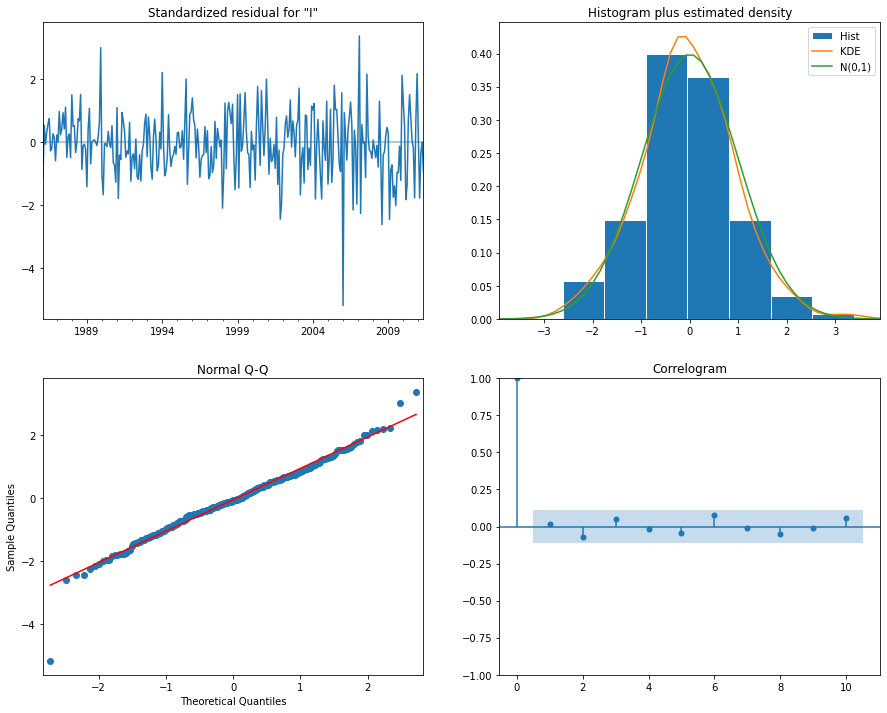

In [375]:
#Printing the graphical statistics of model (correlogram = ACF plot)
results.plot_diagnostics(figsize=(15, 12))
plt.show()

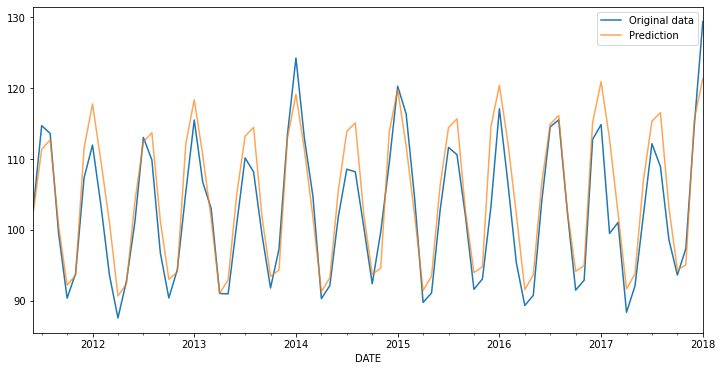

In [377]:
# printing the part of forecasts fitted to original data (for accuracy evaluation)
start=len(train_data)
end=len(train_data)+len(test_data)-1
pred = results.get_prediction(start=start, end=end, dynamic=False)
 # Plot predictions against known values
ax = test_data.plot(label='Original data')
pred.predicted_mean.plot(ax=ax, label='Prediction', alpha=.7)
#ax.fill_between(pred_ci.index,
#                pred_ci.iloc[:, 0],
#                pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.legend()
plt.show()

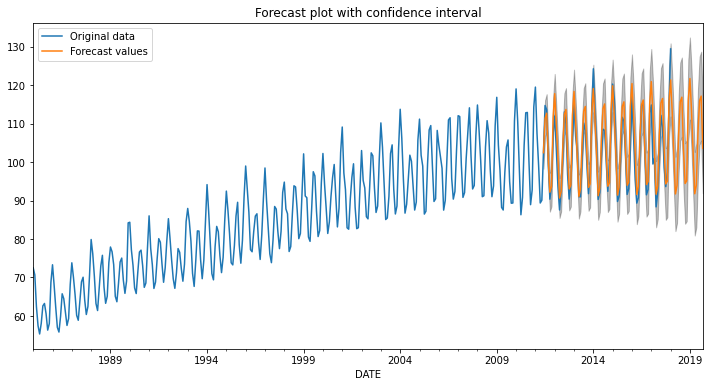

In [424]:
# Get forecast 100 steps ahead in future
pred_uc = results.get_forecast(steps=100) #change the value for other forecast
# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()
# plotting forecasts ahead
ax = newindex.plot(label='Original data')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast values', title='Forecast plot with confidence interval')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.legend()
plt.show()

### Model Evaluation

In [379]:
# Compute the mean square error
MSE = sqrt(((test_data-pred.predicted_mean) ** 2).mean())
print('Root mean Square Error of the forecasts is {}'.format(round(MSE, 2)))

Root mean Square Error of the forecasts is 4.06


In [380]:
# Compute the mean absolute error
MAE = abs(test_data-pred.predicted_mean).mean()
print('Mean Absolute Error of the forecasts is {}'.format(round(MAE, 2)))

Mean Absolute Error of the forecasts is 3.21


In [381]:
# Compute the mean absolute percentage  error
MAPE = (abs(pred.predicted_mean-test_data)/test_data).mean()*100
print('Mean Absolute percentage Error of the forecasts is {}'.format(round(MAPE, 2)))

Mean Absolute percentage Error of the forecasts is 3.1
